In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

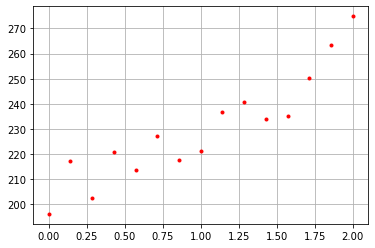

In [17]:
arr = np.load('test_line.npy')
x= arr[0]
y= arr[1]
z=arr[2]
plt.plot(arr[0], arr[1], 'o',c='red', label='Original data', markersize=3)
plt.grid()

30.762307652444452 199.3427240440551


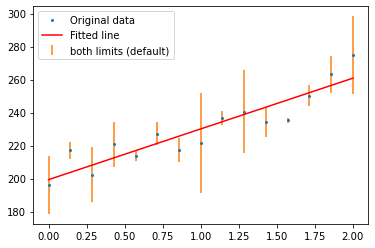

In [15]:
#Ajuste
A = np.vstack([arr[0], np.ones(len(arr[0]))]).T
p, b = np.linalg.lstsq(A, arr[1], rcond=None)[0]

print(p, b)
plt.plot(x, y, 'o', label='Original data', markersize=2)
plt.plot(arr[0], p*arr[0] + b, 'red', label='Fitted line')
plt.errorbar(arr[0], arr[1],yerr= arr[2],ls='',label='both limits (default)')
plt.legend()
plt.show()

In [10]:
Old=[20,200,0.05]
New=np.zeros(3)

def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma < 0:
        return -np.inf  # log(0)
    else:
        return -1.5 * np.log(1 + beta ** 2) - np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)

In [11]:
def muestreo(Old, x, y):   
    #calculamos las propuestas de los parámetros de la recta de manera aleatoria
    New[0]=  np.random.normal(Old[0], Old[2])
    New[1]=  np.random.normal(Old[1], Old[2])
    New[2]=Old[2]

    #calculamos el posterior para el caso anterior y el nuevo (aleatorio)
    P_Old = -log_posterior(Old,x,y)
    P_New = -log_posterior(New,x,y)


    #si es mayor el nuevo posterior lo aceptamos
    if P_New>P_Old:

            Old= New
    
    #si no es mayor comparamos la división del posterior nuevo con el anterior con un número al azar entre cero y 1, si es mayor 
    #lo aceptamos       
    else:

            P_Ok = P_New / P_Old
            accept = np.random.rand() 

            if accept< P_Ok:
            # Update position
                Old= New
   
    return Old

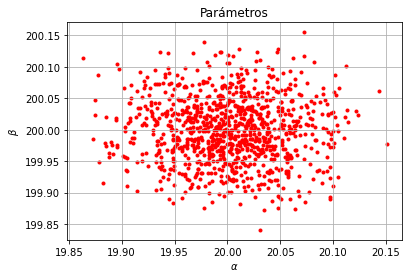

pendiente 20.001300802368064
ordenada al origen 199.99864420311727


In [14]:
#graficamos los resultados de los parámetros
Oldie=[Old]
for i in range(1000):
    Oldie=np.append(Oldie,[muestreo(Old,x,y)],axis=0)

plt.grid()
plt.title('Parámetros')
plt.ylabel('$\\beta$')
plt.xlabel('$\\alpha$')
plt.scatter(Oldie[:,0],Oldie[:,1], marker='.', c='red')
plt.show()

#imprimimos la media de los resultados de los parámetros
print('pendiente '+str(np.mean(Oldie[:,0])))
print('ordenada al origen '+str(np.mean(Oldie[:,1])))
